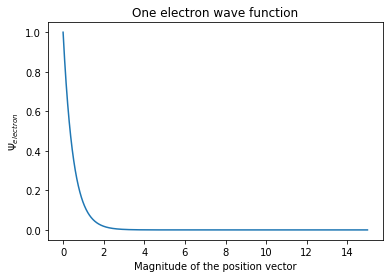

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline


fname="Gauss_result/One_electron_function"
f=open(fname, "r")
line=f.readlines()
n=int(line[1])

x=np.zeros(n)
f=np.zeros(n)

x, f = np.loadtxt(fname,skiprows=3,unpack=True)
plt.figure()
plt.plot(x,f)
plt.title(r"One electron wave function")
plt.ylabel(r"$\Psi_{electron}$")
plt.xlabel(r"Magnitude of the position vector")
plt.savefig("Gauss_result/Plot.pdf")